# Challenge Assignment
## Cliff Walking with Reinforcement Learning

## CSCI E-82A

>**Make sure** you include your name along with the name of your team and team members in the notebook you submit.

**Your name and team name here:** 
### Team Cobra
- Zhong Gao
- Heng Li
- Matt Smith

## Introduction

In this challenge you will apply Monte Carlo reinforcement learning algorithms to a classic problem in reinforcement learning, known as the **cliff walking problem**. The cliff walking problem is a type of game. The goal is for the agent to find the highest reward (lowest cost) path from a starting state to the goal.   

There are a number of versions of the cliff walking problems which have been used as research benchmarks over the years. You can find a short discussion of the cliff walking problem on page 132 of Sutton and Barto, second edition.    

In the general cliff walking problem the agent starts in one corner of the state-space and must travel to goal, or terminal state, in another corner of the state-space. Between the starting state and goal state there is an area with a **cliff**. If the agent falls off a cliff it is sent back to the starting state. A schematic diagram of the state-space is shown in the diagram below.      

<img src="CliffWalkingDiagram.JPG" alt="Drawing" style="width:500px; height:400px"/>
<center> State-space of cliff-walking problem </center>



### Problem Description

The agent must learn a policy to navigate from the starting state to the terminal state. The properties this problem are as follows:

1. The state-space has two **continuous variables**, x and y.
2. The starting state is at $x = 0.0$, $y = 0.0$. 
3. The terminal state has two segments:
  - At $y = 0.0$ is in the range $9.0 \le x \le 10.0$. 
  - At $x = 10.0$ is in the range $0.0 \le y \le 1.0$.  
4. The cliff zone is bounded by:
  - $0.0 \le y \le 1.0$ and 
  - $1.0 \le x \le 9.0$. 
5. An agent entering the cliff zone is returned to the starting state.
6. The agent moves 1.0 units per time step. 
7. The 8 possible **discrete actions** are moves in the following directions:  
  - +x, 
  - +x, +y,
  - +y
  - -x, +y,
  - -x,
  - -x, -y,
  - -y, and
  - +x, -y. 
8. The rewards are:
  - -1 for a time step in the state-space,
  - -10 for colliding with an edge (barrier) of the state-space,
  - -100 for falling off the cliff and returning to the starting state, and 
  - +1000 for reaching the terminal or goal state. 
  


## Instructions

In this challenge you and your team will do the following. Include commentary on each component of your algorithms. Make sure you answer the questions.  

### Environment Simulator   

Your reinforcement learning agent cannot contain any information about the environment other that the starting state and the possible actions. Therefore, you must create an environment simulator, with the following input and output:
- Input: Arguments of state, the $(x,y)$ tuple, and discrete action
- Output: the new state (s'), reward, and if the new state meets the terminal or goal criteria.

Make sure you test your simulator functions carefully. The test cases must include, steps with each of the actions, falling off the cliff from each edge, hitting the barriers, and reaching the goal (terminal) edges. Errors in the simulator will make the rest of this challenge difficult.   

> **Note**: For this problem, coordinate state is represented by a tuple of continuous variables. Make sure that you maintain coordinate state as continuous variables for this problem. 

State: (0, 1), Reward: -1, Terminal: False
State: (0.7071067811865476, 1.7071067811865475), Reward: -1, Terminal: False
State: (1.7071067811865475, 1.7071067811865475), Reward: -1, Terminal: False
State: (0, 0), Reward: -100, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 1), Reward: -1, Terminal: False
State: (0.7071067811865476, 1.7071067811865475), Reward: -1, Terminal: False
State: (1.7071067811865475, 1.7071067811865475), Reward: -1, Terminal: False
State: (0, 0), Reward: -100, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 1), Reward: -1, Terminal: False
State: (0.7071067811865476, 1.7071067811865475), Reward: -1, Terminal: False
State: (1.7071067811865475, 1.70710678118654

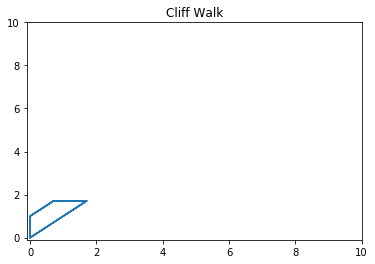

In [30]:
import math
from math import cos
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

# Variables
n_states = 10**2
n_episodes = 1000
radian = (45 * math.pi)/180 #for diagonal movement
initial_state = tuple((0,0))
state = tuple((0,0))
action_index = {0: tuple((0,1)), 1: tuple((1,1)), 2: tuple((1,0)), 
                3: tuple((1,-1)), 4: tuple((0,-1)), 5: tuple((-1,-1)), 
                6:tuple((-1,0)), 7: tuple((-1,-1))}
n_actions = len(action_index)


def sim_walk(state, action):
    # Translate action diagonals if necessary
    if (abs(action[0]) == abs(action[1])):
            action = tuple(np.multiply(action, tuple((cos(radian), cos(radian)))))

    # Update position/state
    terminal = False
    state_prime = tuple(np.add(state, action))
    
    # Check location in grid and terminal state
    grid_prime = tuple((math.floor(state_prime[0]), math.floor(state_prime[1]))) # the current state in grid units
    
    reward = -1

    # Restart if off cliff
    if (off_cliff(state_prime)):
        state_prime = tuple((0,0))
        reward = -100
        
    # Check if goal is met (before boundary)
    if (is_terminal(state_prime)):
        state_prime = grid_prime
        terminal = True
        reward = 1000
                       
    # Check if boundary hit
    if (off_grid(state_prime)):
        state_prime = state
        reward = -10
        
    return (state_prime, grid_prime, reward, terminal)
    
def off_cliff(current_state):
    return ((1 <= current_state[0] <= 9) & 
            ((0 <= current_state[1] <= 1)))

def is_terminal(current_state):
    return ((current_state[0] > 9) & 
            (current_state[1] < 1))

def off_grid(current_state):
    return ((current_state[0] < 0) | 
            (current_state[0] > 10) | 
            (current_state[1] < 0) | 
            (current_state[1] > 10))

## Test the function

state_list = [state]
for i in range(20):
    s_prime, reward, terminal = sim_walk(state, action_index[i % 8])
    state = s_prime
    state_list.append(s_prime)
    print(f"State: {state}, Reward: {reward}, Terminal: {terminal}")
    
def plot_walk(states):  
    plt.axis([-0.1,10, -0.1,10])
    plt.title("Cliff Walk")
    plt.plot(*zip(*states))
    plt.show()
    
plot_walk(state_list)

State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False
State: (0, 0), Reward: -10, Terminal: False


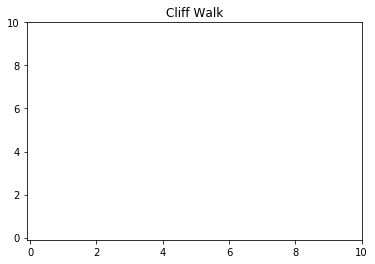

In [42]:
magnitude = 1
def radians(degrees):
    return (degrees * math.pi)/180
current_state = (0,0)
random = np.random.random() * 360
action = tuple((math.sin(radians(random)), math.cos(radians(random))))

def get_action():
    return tuple((math.sin(radians(random)), math.cos(radians(random))))

state_list = [current_state]
for i in range(20):
    s_prime, reward, terminal = sim_walk(current_state, get_action())
    current_state = s_prime
    state_list.append(s_prime)
    print(f"State: {current_state}, Reward: {reward}, Terminal: {terminal}")
    
def plot_walk(states):  
    plt.axis([-0.1,10, -0.1,10])
    plt.title("Cliff Walk")
    plt.plot(*zip(*states))
    plt.show()
    
plot_walk(state_list)

### Grid Approximation

The state-space of the cliff walking problem is continuous. Therefor, you will need to use a **grid approximation** to construct a policy. The policy is specified as the probability of action for each grid cell. For this problem, use a 10x10 grid. 

> **Note:** While the policy uses a grid approximation, state should be represented as continuous variables.

### Initial Policy

Start with a uniform initial policy. A uniform policy has an equal probability of taking any of the 8 possible actions for each cell in the grid representation.     

> **Note:** As has already been stated, the coordinate state representation for this problem is a tuple of coordinate values. However, policy, state-values and action-values are represented with a grid approximation. 

> **Hint:** You may wish to use a 3-dimensional numpy array to code the policy for this problem. With 8 possible actions, this approach will be easier to work with. 



In [41]:
initial_policy = np.ones((8, 10, 10)) / 8
initial_policy

array([[[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125]],

       [[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
         0.125],
        [0.125, 0.1

### Monte Carlo State Value Estimation   

For the initial uniform policy, compute the state values using the Monte Carlo RL algorithm:
1. Compute and print the state values for each grid in the representation. Use at least 1,000 episodes. This will take some time to execute.      
2. Plot the grid of state values, as an image (e.g. matplotlib [imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html)). 
3. Compute the Forbenious norm (Euclidean norm) of the state value array with [numpy.linalg.norm](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html). You will use this figure as a basis to compare your improved policy. 

Study your plot to ensure your state values seem correct. Do these state values seem reasonable given the uniform policy and why? Make sure you pay attention to the state values of the cliff zone.    

> **Hint:** Careful testing at each stage of your algorithm development will potentially save you considerable time. Test your function(s) to for a single episode to make sure your algorithm converges. Then test for say 10 episodes to ensure the state values update in a reasonable manner at each episode.    

> **Note:** The Monte Carlo episodes can be executed in parallel for production systems. The Markov chain of each episode is statistically independent. 

In [5]:
def take_action(state, policy, actions = action_index): 
    action = actions[nr.choice(range(len(actions)), p = policy[:, state[0], state[1]])]
    s_prime, reward, is_terminal = sim_walk(state, action)
    return (action, s_prime, reward, is_terminal)

take_action((0,0), initial_policy)

((1, 1), (0.7071067811865476, 0.7071067811865476), -1, False)

In [45]:
def MC_episode(policy, G, n_visits, episode, n_states):
    ## For each episode we use a list to keep track of states we have visited.
    ## Once we visit a state we need to accumulate values to get the returns
    states_visited = []
    states = list(range(0,policy.shape[1:][0] * policy.shape[1:][1]))
        
    
    ## Find the starting state
    current_state = tuple((0,0))
    terminal = False
    g = 0.0
        
    while(not terminal):
        ## Find the next action and reward
        action, s_prime, reward, terminal = take_action(current_state, policy)
        
        ## Add the reward to the states visited if this is a first visit  
        if(current_state not in states_visited):
            ## Mark that the current state has been visited 
            states_visited.append(current_state) 
            ## Add the reward to states visited 
            for state in states_visited:  
                
                n_visits[state[0]][state[1]] = n_visits[state[0]][state[1]] + 1.0
                G[state[0]][state[1]] = G[state[0]][state[1]] + (reward - G[state[0]][state[1]])/n_visits[state[0]][state[1]]

        ## Update the current state for next transition
        current_state = find_grid_state(s_prime)
    return (G, n_visits) 
    
    
def MC_state_values(policy, n_episodes):
    ## Create list of states 
    states = list(range(0,policy.shape[1:][0] * policy.shape[1:][1]))
    n_states = len(states)
    
    ## An array to hold the accumulated returns as we visit states
    G = np.zeros(policy.shape[1:])
    
    ## An array to keep track of how many times we visit each state so we can 
    ## compute the mean
    n_visits = np.zeros(policy.shape[1:])
    
    ## Iterate over the episodes
    for i in range(n_episodes):
        G, n_visits = MC_episode(policy, G, n_visits, i, n_states)
    
    return(G) 


In [46]:
nr.seed(234)
state_values = MC_state_values(initial_policy, n_episodes = 5000)
print(state_values.reshape((10,10)))

IndexError: index 10 is out of bounds for axis 2 with size 10

### Monte Carlo State Policy Improvement   

Finally, you will perform Monte Carlo RL policy improvement:
1. Starting with the uniform policy, compute action-values for each grid in the representation. Use at least 1,000 episodes.      
2. Use these action values to find an improved policy.
3. To evaluate your updated policy compute the state-values for this policy.  
4. Plot the grid of state values for the improved policy, as an image. 
5. Compute the Forbenious norm (Euclidean norm) of the state value array. 

Compare the state value plot for the improved policy to the one for the initial uniform policy. Does the improved state values increase generally as distance to the terminal states decreases?  Is this what you expect and why?    

Compare the norm of the state values with your improved policy to the norm for the uniform policy. Is the increase significant?  

> **Hint:** Careful testing at each stage of your algorithm development will potentially save you considerable time. Test your function(s) to for a single episode to make sure your algorithm converges. Then test for say 10 episodes to ensure the state values update in a reasonable manner at each episode.   

> **Note:** You could continue to improve policy using the general policy improvement algorithm (GPI). In the interest of time, you are not required to do so here. 

In [ ]:
def print_Q(Q):
    Q = pd.DataFrame(Q, columns = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    print(Q)

def MC_action_values(policy, Q, n_episodes, inital_state):
    n_states = len(policy)
    n_actions = len(policy[0])
    n_visits = np.zeros((n_states, n_actions))
    neighbors = {}
    
    for _ in range(n_episodes):
        Q, n_visits = MC_action_value_episode(policy, Q, n_visits, initial_state, n_states, n_actions)
    return(Q)

initial_Q = np.zeros((n_states, n_actions))
updated_Q = MC_action_values(initial_policy, initial_Q, n_episodes, initial_state)
print_Q(updated_Q)  

In [ ]:
initial_copy = deepcopy(initial_policy)

def update_policy(policy, Q, epsilon, action_index = action_index):
    keys = list(policy[0].keys())
    
    for state in range(len(policy)): 
        q = Q[state,:]
        max_action_index = np.where(q == max(q))[0]

        n_transitions = float(len(q))
        n_max_transitions = float(len(max_action_index))
        p_max_transitions = (1.0 - epsilon *(n_transitions - n_max_transitions))/(n_max_transitions)
  
        for key in keys:
            if(action_index[key] in max_action_index): policy[state][key] = p_max_transitions
            else: policy[state][key] = epsilon
    return(policy)                

improved_policy = update_policy(initial_copy, initial_Q, 0.01) 
improved_policy

In [ ]:
nr.seed(457)
state_values = MC_state_values(improved_policy, n_episodes = 10000)
print(state_values.reshape((10,10)))

## Solution

Create cells below for your solution to the stated problem. Be sure to include some Markdown text and code comments to explain each component of your algorithm. 